# TabFormer Data Set Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fig_folder = '../figures/'

# Data folder

In [2]:
# Data Folder
data_folder = '/Users/efonesca.dos.reis/mrm_fraud/datasets/ieee/'

# Load data

In [4]:
def load_data(file_name, file_folder):
    df = pd.read_csv(file_folder+file_name)
    return df

In [5]:
%%time
# Load data
data_test_id = load_data('test_identity.csv', data_folder)
data_train_id = load_data('train_identity.csv', data_folder)
data_test_trx = load_data('test_transaction.csv', data_folder)
data_train_trx = load_data('train_transaction.csv', data_folder)

CPU times: user 11.6 s, sys: 4.09 s, total: 15.7 s
Wall time: 16.7 s


In [6]:
data_test_id.head(3)

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0


In [7]:
data_test_trx.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

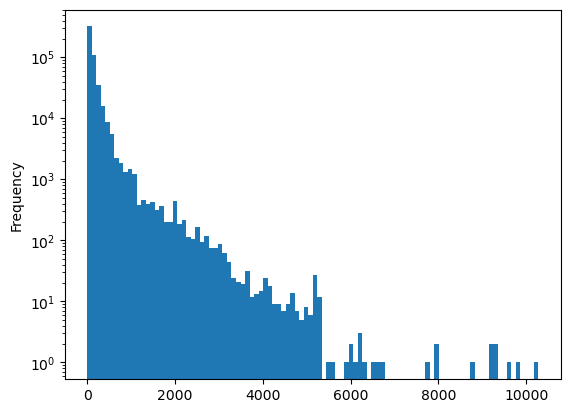

In [10]:
data_test_trx.TransactionAmt.plot(kind='hist', bins=100, logy=True)

<Axes: ylabel='Frequency'>

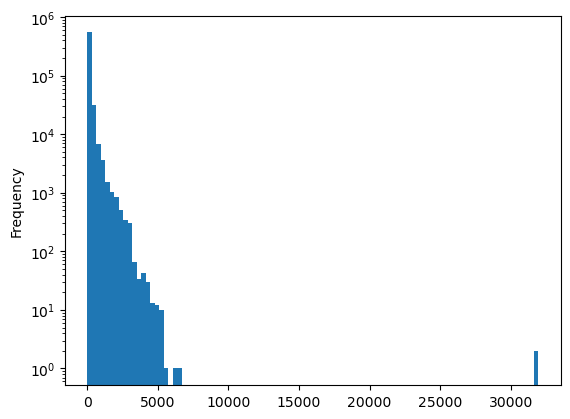

In [11]:
data_train_trx.TransactionAmt.plot(kind='hist', bins=100, logy=True)

<Axes: ylabel='Frequency'>

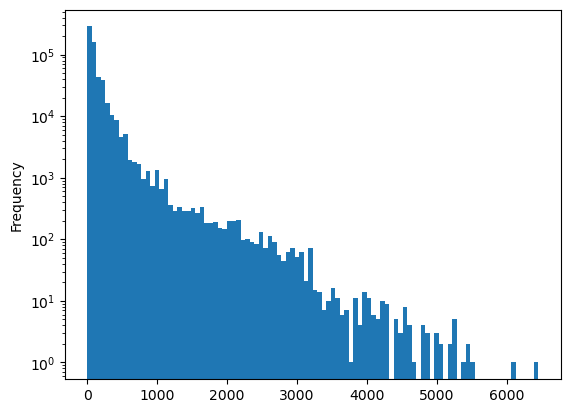

In [12]:
data_train_trx.TransactionAmt.loc[data_train_trx.TransactionAmt<20000].plot(kind='hist', bins=100, logy=True)

In [10]:
data_train_trx.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [75]:
data.nunique()

User                2000
Card                   9
Year                  30
Month                 12
Day                   31
Time                1440
Amount             98953
Use Chip               3
Merchant Name     100343
Merchant City      13429
Merchant State       223
Zip                27321
MCC                  109
Errors?               23
Is Fraud?              2
dtype: int64

# Preprocess data

In [76]:
# --- Preprocessing raw data ---
def preprocess_data(df):
    ''' Preprocess raw data. '''

    # Rename columns
    df.rename(columns={'Merchant Name':'MerchantName', 
                       'Merchant City':'MerchantCity', 
                       'Is Fraud?':'isFraud', 
                       'Merchant State':'MerchantState',
                       'Errors?':'Error'
                      },
              inplace=True
             )

    # Replace fraud flags by 0 and 1
    df.isFraud = df.isFraud.replace({'No':'0', 'Yes':'1'}).astype(int)

    # Join date and time and converto to datetime: transactionTime
    transactionTime = pd.to_datetime(df.Year.astype(str) + '-' 
                                     + df.Month.astype(str) + '-' 
                                     + df.Day.astype(str) + ' ' 
                                     + df.Time.astype(str))
    df.insert(0, 'transactionTime', transactionTime)
    
    # Sort dataframe by transaction time
    df = df.sort_values(by='transactionTime')
    
    # General temporal features
    df.insert(1, 'hour', df['transactionTime'].dt.hour)
    df.insert(1, 'weekday', df['transactionTime'].dt.dayofweek)
    df.insert(1, 'month', df['transactionTime'].dt.month)
    df.insert(1, 'year', df['transactionTime'].dt.year)

    # Select only years which have fraud transactions
    s = df.groupby('year').isFraud.sum()
    df = df.loc[df.year.isin(s[s!=0].index)]
    
    # Convert 'Amount' to fload
    df.Amount = df.Amount.str[1:].astype(float)

    # Convert 'MerchantName' to string
    df.MerchantName = df.MerchantName.astype(str)

    # Convert 'UseChip' to numeric 'merchantNum'
    UseChipStr_to_UseChipNum = {UseChipStr:UseChipNum for UseChipNum, UseChipStr in enumerate(df['Use Chip'].unique())}
    idx = list(df.columns).index('Use Chip')
    df.insert(idx, 'UseChip', df['Use Chip'].map(UseChipStr_to_UseChipNum))
    df.drop('Use Chip', axis=1, inplace=True)

    
    df.drop(['Year', 'Month', 'Day', 'Time'], axis=1, inplace=True)
    
    # Imput a value for missing values
    df.MerchantState = df.MerchantState.fillna('Missing')
    df.Zip = df.Zip.fillna(0)
    # No error variable
    df.Error = df.Error.fillna('NoError')

    return df

In [77]:
%%time
# Preprocess
data = preprocess_data(data)

CPU times: user 36.8 s, sys: 6.11 s, total: 42.9 s
Wall time: 44.5 s


In [78]:
data.head(3)

,transactionTime,year,month,weekday,hour,User,Card,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,Error,isFraud
18443822,1996-01-01 00:32:00,1996,1,0,0,1490,6,18.38,0,2027553650310142703,Tacoma,WA,98404.0,5541,NoError,0
5868940,1996-01-01 01:14:00,1996,1,0,1,491,3,58.11,0,6698459923198770712,Youngwood,PA,15697.0,4814,NoError,0
8546447,1996-01-01 04:37:00,1996,1,0,4,736,0,91.50,0,-8457365760080597732,Joliet,IL,60436.0,4900,NoError,0


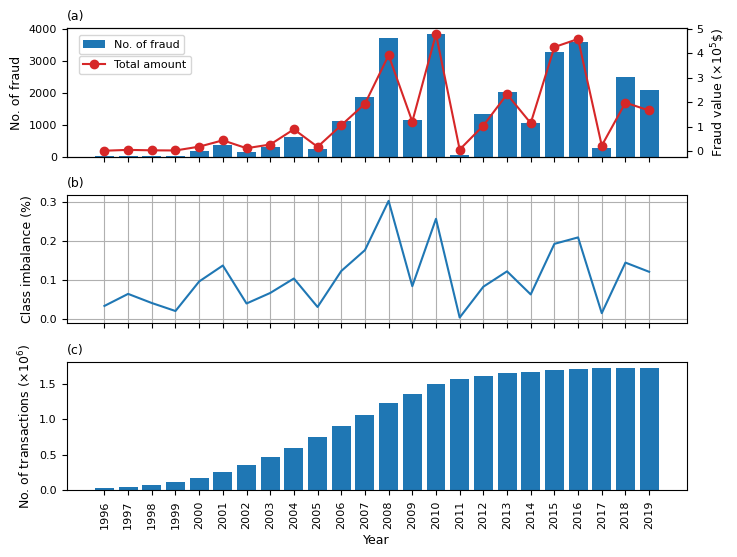

In [49]:
axis_label_fs = 9
axis_tick_fs = 8
legend_fs = 8
title_fs = 9

fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)


# Number and value of fraud
x = data.groupby('year', as_index=True)['isFraud'].sum()
y = data.loc[data.isFraud == 1].groupby('year')['Amount'].sum()
ax[0].bar(x.index, x.values, label='No. of fraud')
ax01 = ax[0].twinx()
ax01.plot(y.index, y.values/1e5, c='tab:red', marker='o', label='Total amount')

# Class imbalance
fraud_imb = 100*data.groupby('year')['isFraud'].sum()/data.groupby('year')['isFraud'].count()
ax[1].plot(fraud_imb.index, fraud_imb.values)

# Total number of transactions
ntx = data.groupby('year')['isFraud'].count()
ax[2].bar(ntx.index, ntx.values/1e6)


# Formatting

ax[0].set_ylabel('No. of fraud', fontsize=axis_label_fs)
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=legend_fs)
ax[0].set_title('(a)', fontsize=title_fs, loc='left')
ax01.set_ylabel('Fraud value '+r'$(\times 10^5 \$)$', fontsize=axis_label_fs)
ax01.legend(loc='upper left', bbox_to_anchor=(0.01, 0.83), fontsize=legend_fs)

ax[1].grid(axis='both')
ax[1].set_title('(b)', loc='left', fontsize=title_fs)
ax[1].set_ylabel('Class imbalance (%)', fontsize=axis_label_fs)

ax[2].set_ylabel('No. of transactions '+r'$(\times 10^6)$', fontsize=axis_label_fs)
ax[2].set_title('(c)', loc='left', fontsize=title_fs)
ax[2].set_xlabel('Year', fontsize=axis_label_fs)


ax[0].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)
ax01.set_yticks(np.arange(6), np.arange(6))
ax[1].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)
ax[2].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)

ax[0].tick_params(labelsize=axis_tick_fs)
ax01.tick_params(labelsize=axis_tick_fs)
ax[1].tick_params(labelsize=axis_tick_fs)
ax[2].tick_params(labelsize=axis_tick_fs)

# xlim=[1996, 2019]
# ax[0].set_xlim(xlim)
# ax[0].set_xlim(xlim)

plt.subplots_adjust(hspace=0.3)
plt.savefig(fig_folder+'TabFormer_dataset.png', bbox_inches='tight', dpi=300)
plt.show()

# Save years separately

In [80]:
def save_data_year(df, file_name, file_folder):
    # Save each year separately
    for year in data.year.unique():
        data_year = data.loc[data.year == year]
        data_year.to_csv(file_folder+file_name[:-4]+'-'+str(year)+'.csv', index=False)

In [81]:
%%time
save_data_year(data, file_name, data_folder)

CPU times: user 1min 22s, sys: 2.6 s, total: 1min 25s
Wall time: 1min 26s


In [146]:
%%time
# Test
data2 = pd.DataFrame()
for year in data.year.unique():
    data2 = pd.concat([data2, load_data(file_name[:-4]+'-'+str(year)+'.csv', data_folder)])

CPU times: user 17.9 s, sys: 7.72 s, total: 25.6 s
Wall time: 27.3 s


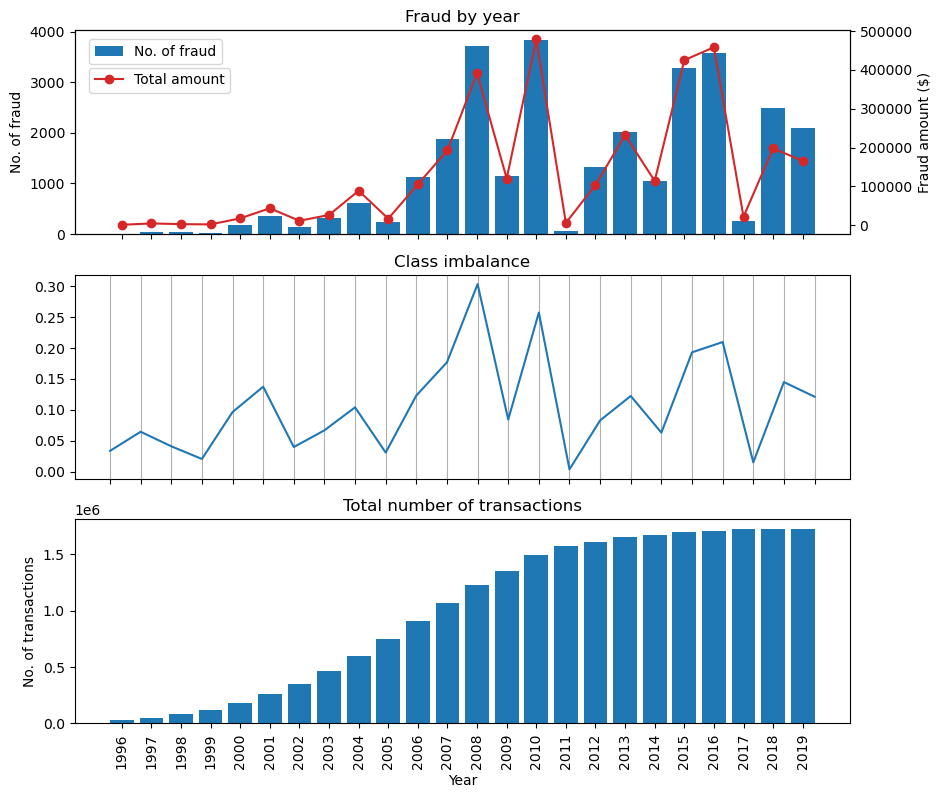

In [147]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))


x = data2.groupby('year', as_index=True)['isFraud'].sum()
y = data2.loc[data2.isFraud == 1].groupby('year')['Amount'].sum()

ax[0].bar(x.index, x.values, label='No. of fraud')
ax[0].set_ylabel('No. of fraud')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99))
ax[0].set_title('Fraud by year')

ax2 = ax[0].twinx()
ax2.plot(y.index, y.values, c='tab:red', marker='o', label='Total amount')
ax2.set_ylabel('Fraud amount ($)')
ax2.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85))

fraud_imb = 100*data2.groupby('year')['isFraud'].sum()/data2.groupby('year')['isFraud'].count()
ax[1].plot(fraud_imb.index, fraud_imb.values)

ax[1].grid(axis='x')
ax[1].set_title('Class imbalance')

ntx = data2.groupby('year')['isFraud'].count()
ax[2].bar(ntx.index, ntx.values)
ax[2].set_ylabel('No. of transactions')
ax[2].set_title('Total number of transactions')

ax[0].set_xticks(x.index, ['' for i in x.index], rotation=90)
ax[1].set_xticks(x.index, ['' for i in x.index], rotation=90)
ax[2].set_xticks(x.index, x.index, rotation=90)
ax[2].set_xlabel('Year')

plt.show()